In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')


In [80]:
#Reading our train data
train_data = pd.read_csv("train_ctrUa4K (1).csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
#Reading our test data
test_data = pd.read_csv
test_data = pd.read_csv("test_lAUu6dG (1).csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [82]:
#cheking the rows and columns of the train data set
train_data.shape

(614, 13)

The train data comprise of 614 rows and 13 columns 

In [84]:
# checking the tet data frame rows and columns
test_data.shape

(367, 12)

our test data has 367 rows and 12 columns

In [86]:
# checking the train data frame information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


the test data frame has 8 objects,1 integer and four objects 

In [88]:
#statistical findings
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The descriptive statistics show that the dataset contains 614 records, with missing values in **LoanAmount**, **Loan_Amount_Term**, and **Credit_History**. Applicant and coapplicant incomes exhibit high variability and right-skewness, indicating the presence of outliers. Most loan amounts are concentrated around the median, while the loan repayment term is predominantly 360 months. Credit history is largely positive, suggesting that most applicants have a good credit record.


In [90]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


The summary statistics indicate that this subset contains 367 records, with missing values observed in **LoanAmount**, **Loan_Amount_Term**, and **Credit_History**. Applicant and coapplicant incomes show substantial variability and right-skewness, with several high-income outliers. Loan amounts are moderately dispersed around the median, while the loan term is predominantly 360 months. Most applicants have a positive credit history, suggesting generally good creditworthiness within the dataset.


# Data Preprocessing

We're going to look into :
1. missing values
2. Duplicated values
3. Data types
4. outliers 


In [94]:
# checking for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Our train data has some missing values in various columns. Gender has 13, Married has 3,Dependants has 15,Self employed has 32,loanamount 22,loan_amount_term 14 and credit history 50

In [96]:
#checking the percentage of missing values 
# Percentage of missing values
missing_percent = train_data.isnull().sum() / len(train_data) * 100
missing_percent


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

The dataset contains a few missing values, with the highest being in **Credit_History** at 8.14%, followed by **Self_Employed** (5.21%) and **LoanAmount** (3.58%). Other columns such as **Dependents**, **Gender**, **Loan_Amount_Term**, and **Married** have less than 3% missing data each. Since the proportion of missing values is relatively low, they can be handled through imputation. Categorical columns can be filled with their most frequent value (mode), while numerical columns like **LoanAmount** can be filled with the median. Addressing these missing values ensures the dataset is complete and ready for further analysis or modeling.


In [98]:
# List of categorical columns to fill (including Dependents)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Fill missing values in numerical columns
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

# Verify that all missing values are handled
train_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [100]:
#checking the percentage of missing values 
# Percentage of missing values
missing_percent = test_data.isnull().sum() / len(test_data) * 100
missing_percent


Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [101]:
#Filling in of missing values 
# List of categorical columns to fill (including Dependents)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Fill missing values in numerical columns
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
# Save the cleaned test dataset
test_data.to_csv("test_cleaned.csv", index=False)
# Verify that all missing values are handled
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [118]:
#Finding if we have any duplicated values
train_data.duplicated().sum()

np.int64(0)

our dataframe has no missing values 

In [131]:
# Check data types for train and test datasets

# Check data types for train and test datasets
print("Train Data Types:")
print(train_data.dtypes)

print("\nTest Data Types:")
print(test_data.dtypes)


Train Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Test Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [133]:
# Fixing data types
train_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Dependents'] = train_data['Dependents'].astype(int)

test_data['Dependents'].replace('3+', 3, inplace=True)
test_data['Dependents'] = test_data['Dependents'].astype(int)


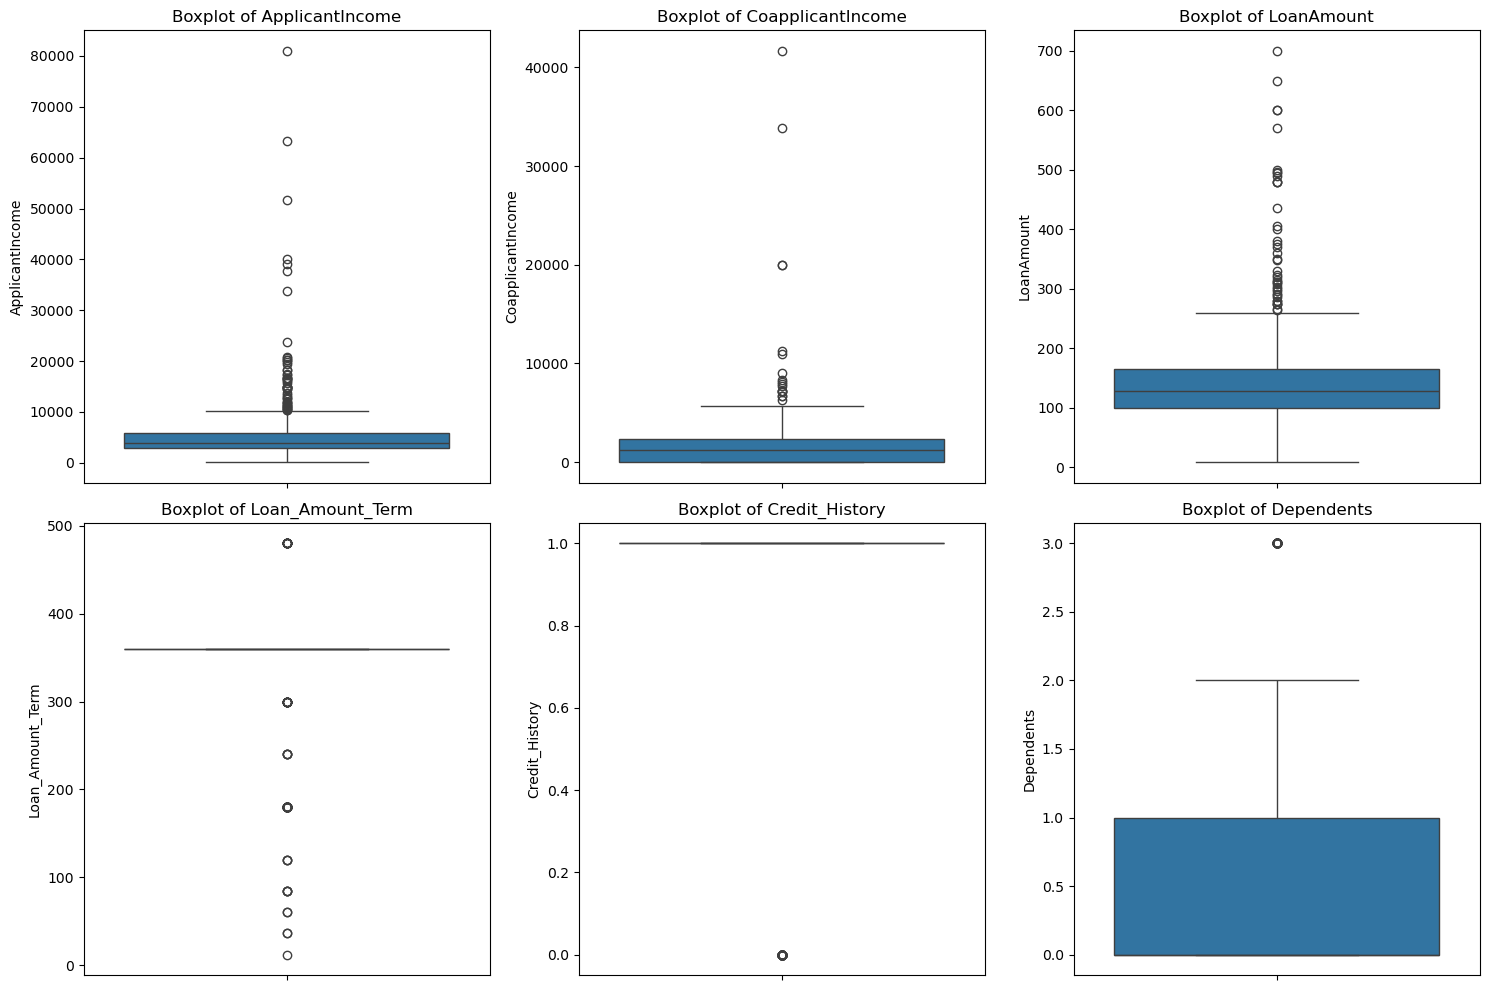

In [137]:
#Checking for outliers
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


The numerical features in the dataset, including ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term, contain several extreme values, as revealed by boxplot analysis. These outliers, particularly high incomes and large loan amounts, could potentially skew model predictions if left unaddressed. To mitigate this, outliers can either be capped using interquartile ranges (IQR) or transformed using logarithmic scaling, which reduces their impact while preserving the overall data distribution. Handling these extreme values ensures that the machine learning model can learn patterns more effectively and produce more reliable predictions for loan eligibility.

# Exploratory Data Analysis
# Univariate Analysis

# How is the dataset split between male and female applicants?

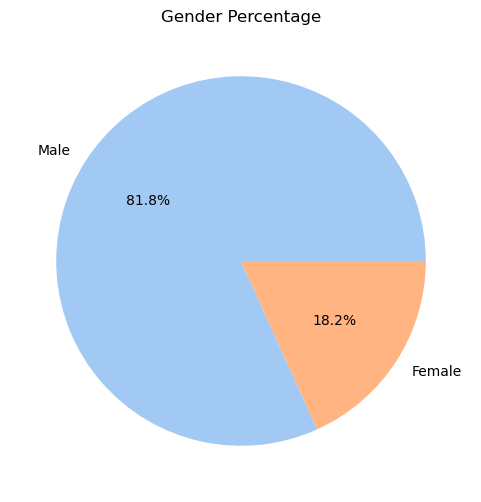

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = train_data['Gender'].value_counts()
percent = train_data['Gender'].value_counts(normalize=True)*100


# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Gender Percentage")
plt.show()


most of the applicants are male ith 82% compared to 18.2% of females 

# What proportion of applicants are married vs unmarried?

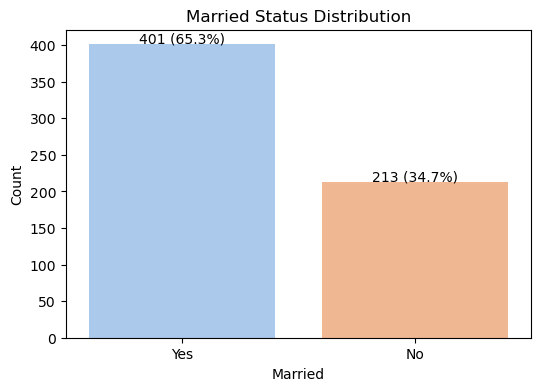

In [156]:
counts = train_data['Married'].value_counts()
percent = train_data['Married'].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, f"{v} ({percent[i]:.1f}%)", ha='center')
plt.title("Married Status Distribution")
plt.ylabel("Count")
plt.show()



most of the applicants are the married once with a higher percentage of 65.3%

# How many dependents do applicants have, and which group is most common?

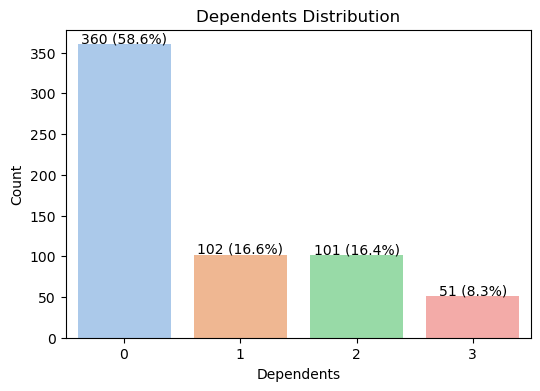

In [162]:
counts = train_data['Dependents'].value_counts()
percent = train_data['Dependents'].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, f"{v} ({percent[i]:.1f}%)", ha='center')
plt.title("Dependents Distribution")
plt.ylabel("Count")
plt.show()




In the dataset, the majority of applicants have no dependents, accounting for 58.6% of the total. Applicants with one dependent make up 16.6%, while those with two dependents are nearly the same at 16.4%. A smaller proportion of applicants, 8.3%, have three or more dependents. This distribution indicates that most loan applicants in the dataset are either single or have no financial dependents, with only a small fraction supporting larger families.

# How are applicants distributed between graduates and non-graduates

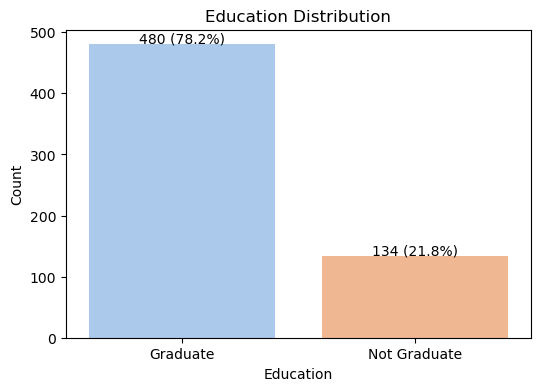

In [171]:
col = 'Education'
counts = train_data[col].value_counts()
percent = train_data[col].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, f"{v} ({percent[i]:.1f}%)", ha='center')
plt.title(f"{col} Distribution")
plt.ylabel("Count")
plt.show()



# What proportion of applicants are self-employed?

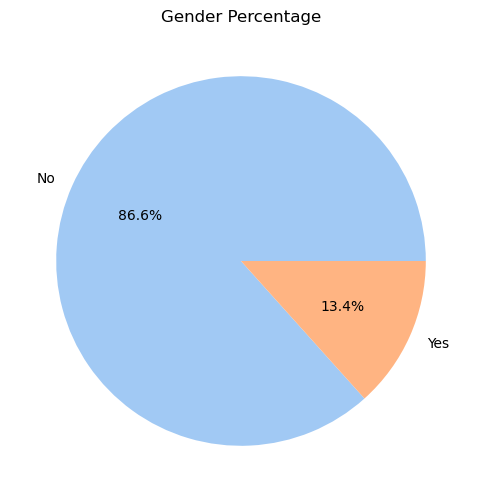

In [175]:
col = 'Self_Employed'
counts = train_data[col].value_counts()
percent = train_data[col].value_counts(normalize=True)*100
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Gender Percentage")
plt.show()


In the dataset, the majority of applicants are not self-employed, representing 80.6% of the total, while only a small portion of applicants are self-employed. This indicates that most applicants rely on salaried or regular employment sources rather than running their own business.

# What is the distribution of applicant income, and are there extreme values?

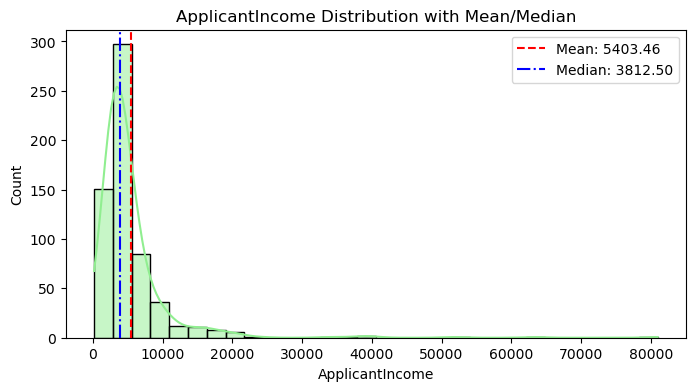

In [180]:
col = 'ApplicantIncome'

plt.figure(figsize=(8,4))
sns.histplot(train_data[col], kde=True, bins=30, color="lightgreen")
plt.axvline(train_data[col].mean(), color='red', linestyle='--', label=f"Mean: {train_data[col].mean():.2f}")
plt.axvline(train_data[col].median(), color='blue', linestyle='-.', label=f"Median: {train_data[col].median():.2f}")
plt.title(f"{col} Distribution with Mean/Median")
plt.legend()
plt.show()



The applicant income distribution is highly right-skewed, with most applicants earning between 0 and 10,000. The mean (5,403) is noticeably higher than the median (3,812), indicating the presence of high-income outliers that stretch the distribution up to around 80,000–90,000. These extreme values could influence loan prediction models and may require preprocessing, such as capping or transformation.

# What is the distribution of loan amounts and are there extreme values?

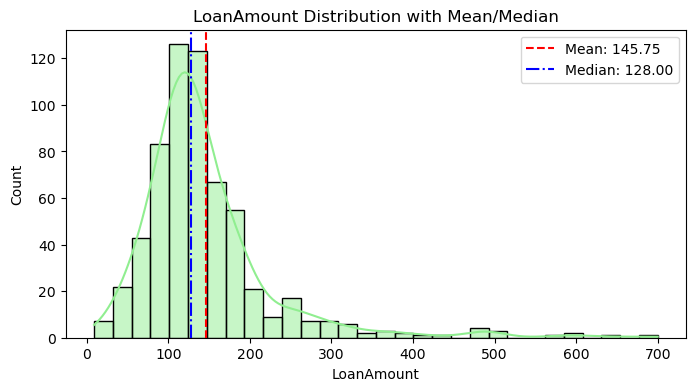

In [184]:
col = 'LoanAmount'

plt.figure(figsize=(8,4))
sns.histplot(train_data[col], kde=True, bins=30, color="lightgreen")
plt.axvline(train_data[col].mean(), color='red', linestyle='--', label=f"Mean: {train_data[col].mean():.2f}")
plt.axvline(train_data[col].median(), color='blue', linestyle='-.', label=f"Median: {train_data[col].median():.2f}")
plt.title(f"{col} Distribution with Mean/Median")
plt.legend()
plt.show()



The loan amount distribution is right-skewed, with most loans concentrated between 100–200, peaking around 120–150. The mean (145.75) is slightly higher than the median (128), indicating some higher-value loans stretching the distribution. A few upper outliers exist in the 500–700 range, but overall, the distribution is relatively controlled and more standardized compared to applicant income

# What loan terms are most common and how are they distributed?

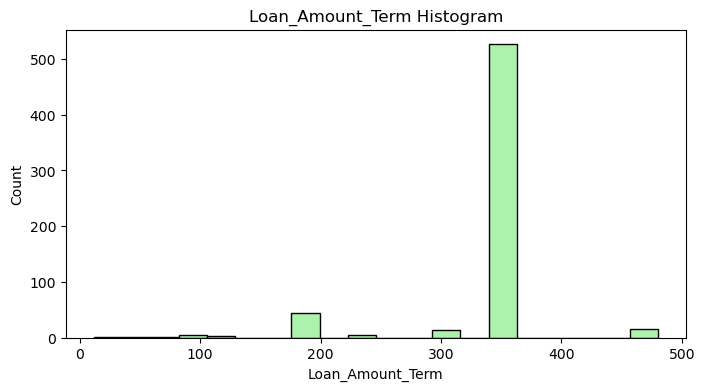

In [191]:
col = 'Loan_Amount_Term'
counts = train_data[col].value_counts()
percent = train_data[col].value_counts(normalize=True) * 100

plt.figure(figsize=(8,4))
sns.histplot(train_data[col], bins=20, kde=False, color="lightgreen")
plt.title(f"{col} Histogram")
plt.show()



The loan term distribution is highly concentrated around 360 months, indicating that most applicants opt for a 30-year loan term. Other loan terms (like 120, 180, 240, 300, and 480 months) appear much less frequently, with very few applicants choosing these durations. This shows that lenders and borrowers strongly prefer the standard long-term option, while shorter or unusual terms are rare.